In [1]:
# Import libs

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [4]:
# Grab data

df = pd.read_csv('heart_2022_with_nans.csv')

df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
def show_heat_map(df):
    plt.figure(figsize = (8, 12))
    sns.heatmap(df.isna().transpose(), cmap = 'Blues')
    plt.show()

    print(df.shape)

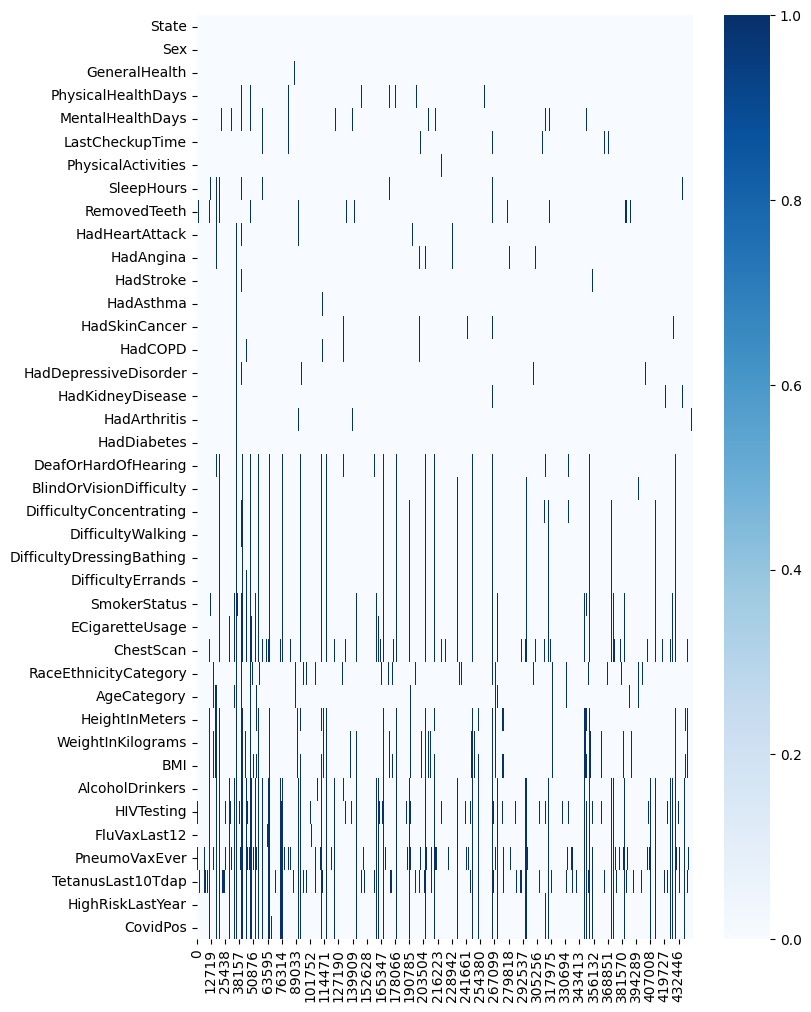

(445132, 40)


In [6]:
# Show heat map of missing values

show_heat_map(df)

In [7]:
# Drop rows with more than 10 missing values

df = df.dropna(thresh = 30, axis = 0)

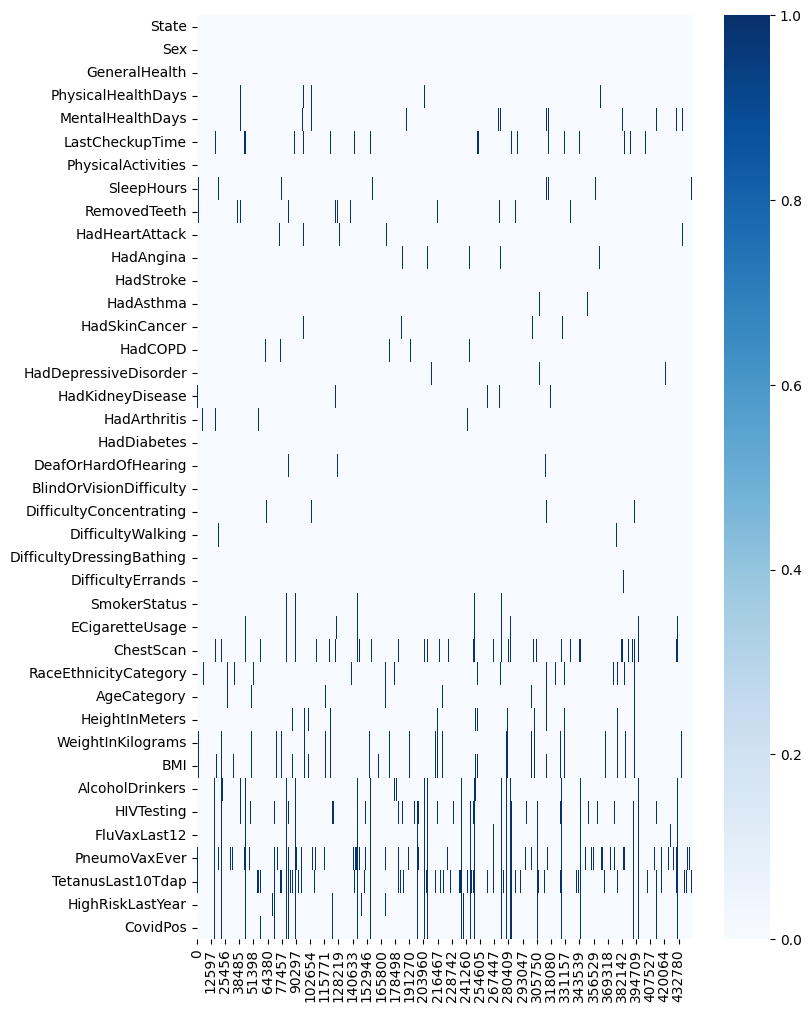

(416884, 40)


In [8]:
show_heat_map(df)

In [9]:
# Show % of missing values in each colum 

df.isna().sum() / df.shape[0] * 100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.238196
PhysicalHealthDays            2.293204
MentalHealthDays              1.902448
LastCheckupTime               1.733336
PhysicalActivities            0.201975
SleepHours                    1.115658
RemovedTeeth                  2.350534
HadHeartAttack                0.586014
HadAngina                     0.905768
HadStroke                     0.281133
HadAsthma                     0.331507
HadSkinCancer                 0.634469
HadCOPD                       0.416663
HadDepressiveDisorder         0.541877
HadKidneyDisease              0.357174
HadArthritis                  0.513092
HadDiabetes                   0.173669
DeafOrHardOfHearing           0.343261
BlindOrVisionDifficulty       0.292168
DifficultyConcentrating       0.638067
DifficultyWalking             0.328868
DifficultyDressingBathing     0.139367
DifficultyErrands             0.296485
SmokerStatus             

In [10]:
# Dropd rows with Nan HadHeartAttack, so it is a target value 

df = df.dropna(subset = ['HadHeartAttack'])

print(df.isna().sum() / df.shape[0] * 100)

df.info()

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.231155
PhysicalHealthDays            2.256533
MentalHealthDays              1.877469
LastCheckupTime               1.715081
PhysicalActivities            0.198339
SleepHours                    1.090143
RemovedTeeth                  2.324094
HadHeartAttack                0.000000
HadAngina                     0.796495
HadStroke                     0.234533
HadAsthma                     0.313917
HadSkinCancer                 0.609254
HadCOPD                       0.392094
HadDepressiveDisorder         0.512980
HadKidneyDisease              0.344319
HadArthritis                  0.499227
HadDiabetes                   0.164076
DeafOrHardOfHearing           0.337081
BlindOrVisionDifficulty       0.285203
DifficultyConcentrating       0.626386
DifficultyWalking             0.322845
DifficultyDressingBathing     0.135604
DifficultyErrands             0.291718
SmokerStatus             

In [11]:
df.duplicated().sum()

11

In [12]:
# Dropw dublicates

df = df.drop_duplicates()

df.shape

(414430, 40)

In [13]:
# Show classes frequency in each colum

for i in df.columns:
    print(f"{i} :\n{df[i].value_counts()}")
    print("------------------------------\n")

State :
Washington              24408
New York                15950
Minnesota               15738
Ohio                    15266
Maryland                14936
Texas                   12893
Florida                 12126
Kansas                  10663
Massachusetts           10497
Wisconsin               10494
Maine                   10369
California               9914
Virginia                 9727
Arizona                  9435
Indiana                  9329
Michigan                 9207
Utah                     9182
South Carolina           9076
Colorado                 8726
Connecticut              8705
Iowa                     8528
Georgia                  8341
Vermont                  8115
Hawaii                   7375
South Dakota             7289
Missouri                 7162
New Jersey               7161
Nebraska                 7140
Montana                  6811
New Hampshire            6189
Idaho                    6124
Oregon                   5605
Alaska                   5468
Pu

In [14]:
# Sefine list of cilums with diffrent preprocecing

# Just drop & apply lable encoding
to_drop = ['GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma',
           'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
           'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'SmokerStatus', 'ChestScan', 'AlcoholDrinkers',
           'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HadHeartAttack']

# Fill with mode & apply label encoding
to_fill = ['State', 'Sex','RemovedTeeth', 'DifficultyDressingBathing', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyErrands', 'ECigaretteUsage',
           'RaceEthnicityCategory', 'AgeCategory', 'HighRiskLastYear', 'CovidPos', 'TetanusLast10Tdap']

# Fill with median
float_fill = ['BMI', 'WeightInKilograms', 'HeightInMeters', 'SleepHours', 'MentalHealthDays', 'PhysicalHealthDays']

label_encoder = LabelEncoder()
for i in to_drop:
    df = df.dropna(subset = [i])
    df[i] = label_encoder.fit_transform(df[i])

df.info()

<ipython-input-14-34a788701b68>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])
<ipython-input-14-34a788701b68>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])
<ipython-input-14-34a788701b68>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311259 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      311259 non-null  object 
 1   Sex                        311259 non-null  object 
 2   GeneralHealth              311259 non-null  int64  
 3   PhysicalHealthDays         305623 non-null  float64
 4   MentalHealthDays           306793 non-null  float64
 5   LastCheckupTime            311259 non-null  int64  
 6   PhysicalActivities         311259 non-null  int64  
 7   SleepHours                 308845 non-null  float64
 8   RemovedTeeth               305171 non-null  object 
 9   HadHeartAttack             311259 non-null  int64  
 10  HadAngina                  311259 non-null  int64  
 11  HadStroke                  311259 non-null  int64  
 12  HadAsthma                  311259 non-null  int64  
 13  HadSkinCancer              31

In [15]:
for i in to_fill:
    df[i] = df[i].fillna(df[i].mode())
    df[i] = label_encoder.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311259 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      311259 non-null  int64  
 1   Sex                        311259 non-null  int64  
 2   GeneralHealth              311259 non-null  int64  
 3   PhysicalHealthDays         305623 non-null  float64
 4   MentalHealthDays           306793 non-null  float64
 5   LastCheckupTime            311259 non-null  int64  
 6   PhysicalActivities         311259 non-null  int64  
 7   SleepHours                 308845 non-null  float64
 8   RemovedTeeth               311259 non-null  int64  
 9   HadHeartAttack             311259 non-null  int64  
 10  HadAngina                  311259 non-null  int64  
 11  HadStroke                  311259 non-null  int64  
 12  HadAsthma                  311259 non-null  int64  
 13  HadSkinCancer              31

In [16]:
for i in float_fill:
    df[i] = df[i].fillna(df[i].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311259 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      311259 non-null  int64  
 1   Sex                        311259 non-null  int64  
 2   GeneralHealth              311259 non-null  int64  
 3   PhysicalHealthDays         311259 non-null  float64
 4   MentalHealthDays           311259 non-null  float64
 5   LastCheckupTime            311259 non-null  int64  
 6   PhysicalActivities         311259 non-null  int64  
 7   SleepHours                 311259 non-null  float64
 8   RemovedTeeth               311259 non-null  int64  
 9   HadHeartAttack             311259 non-null  int64  
 10  HadAngina                  311259 non-null  int64  
 11  HadStroke                  311259 non-null  int64  
 12  HadAsthma                  311259 non-null  int64  
 13  HadSkinCancer              31

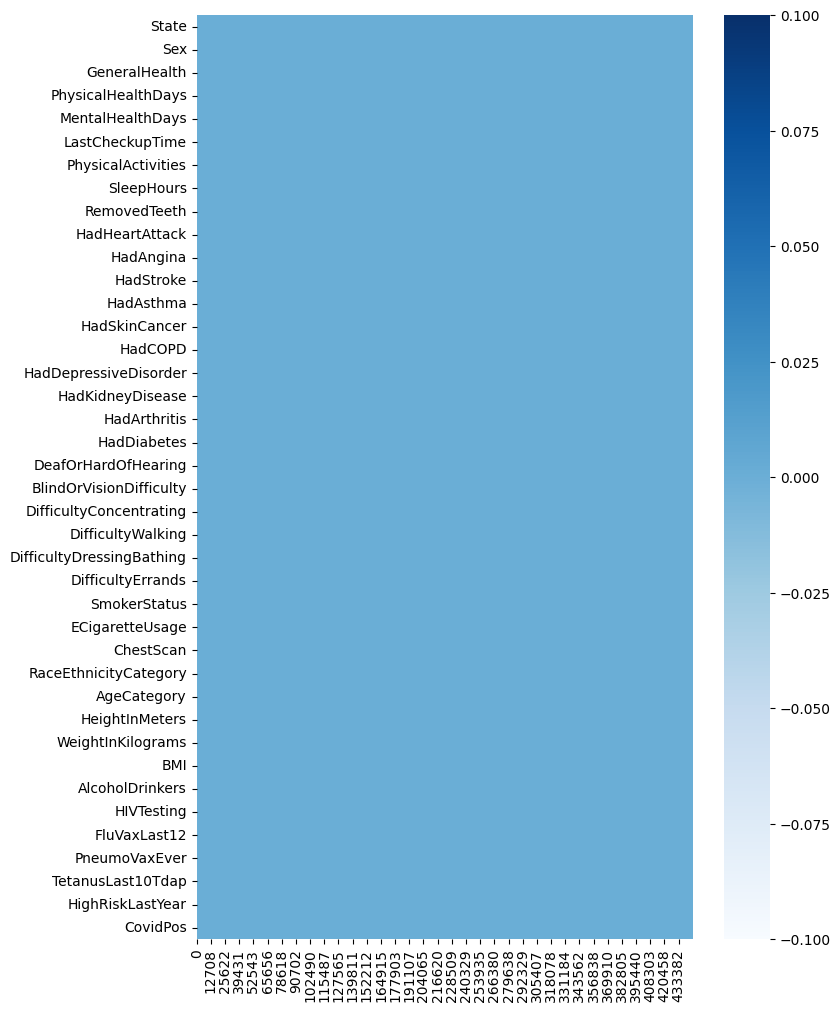

(311259, 40)


In [17]:
# Now data is clean

show_heat_map(df)

<Axes: >

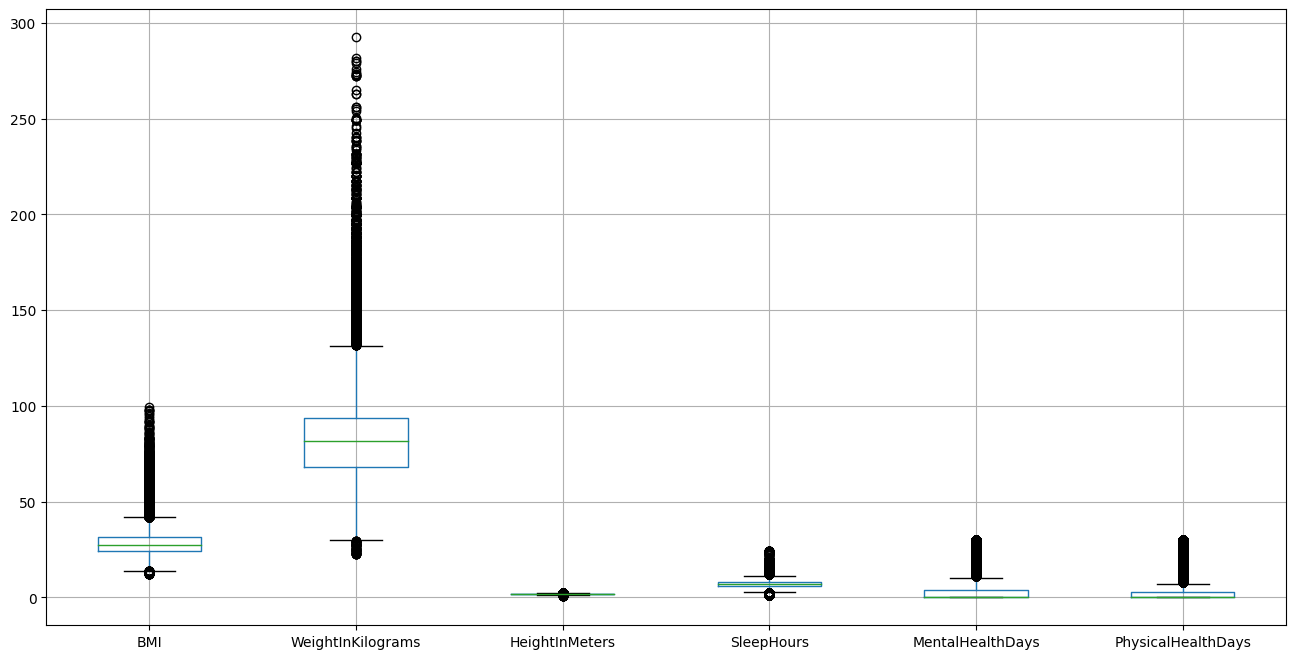

In [18]:
# Show box plots of float varibles

df[float_fill].boxplot(figsize = (16, 8))

{'whiskers': [<matplotlib.lines.Line2D at 0x790cd57f2dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x790cd57f3a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cd57f22c0>],
 'medians': [<matplotlib.lines.Line2D at 0x790cd7b2f2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cd62e26b0>],
 'means': []}

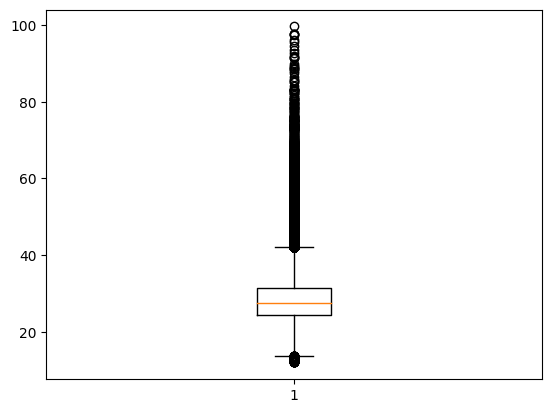

In [19]:
plt.boxplot(df['BMI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790cd62685e0>,
 'caps': [<matplotlib.lines.Line2D at 0x790cd6268c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cd62682b0>],
 'medians': [<matplotlib.lines.Line2D at 0x790cd6269300>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cd6269660>],
 'means': []}

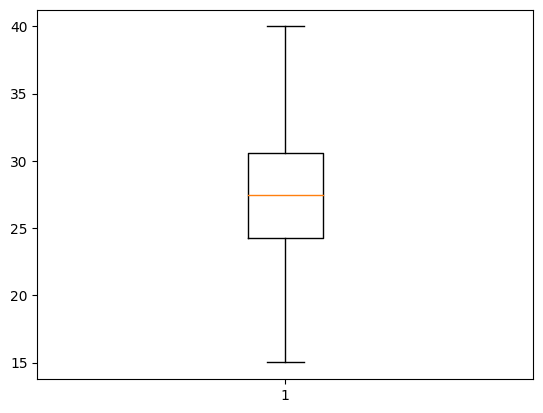

In [20]:
# Drop outlines

df = df[(df['BMI'] > 15) & (df['BMI'] < 40)]
plt.boxplot(df['BMI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790cd6323070>,
 'caps': [<matplotlib.lines.Line2D at 0x790cd6323b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cd6322a40>],
 'medians': [<matplotlib.lines.Line2D at 0x790cd6323c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cd63237f0>],
 'means': []}

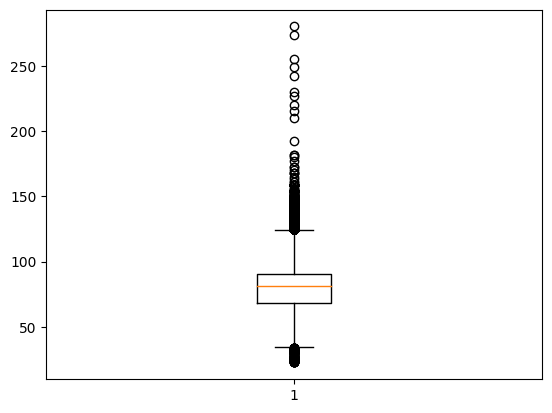

In [21]:
plt.boxplot(df['WeightInKilograms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790cdc742470>,
 'caps': [<matplotlib.lines.Line2D at 0x790cdc743160>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cdc741a20>],
 'medians': [<matplotlib.lines.Line2D at 0x790cdc743be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cdc7401c0>],
 'means': []}

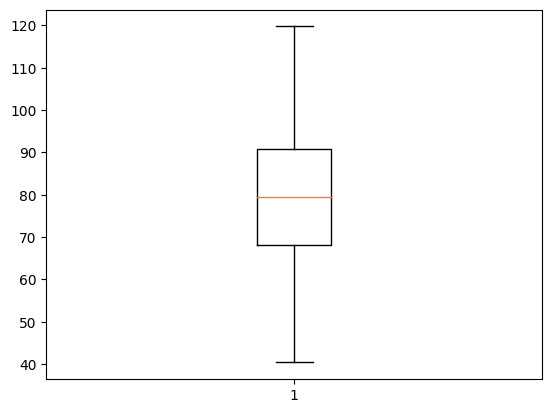

In [22]:
df = df[(df['WeightInKilograms'] < 120) & (df['WeightInKilograms'] > 40)]
plt.boxplot(df['WeightInKilograms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790cdc771fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x790cdc772ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cd626b460>],
 'medians': [<matplotlib.lines.Line2D at 0x790cdc770460>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cdc772f20>],
 'means': []}

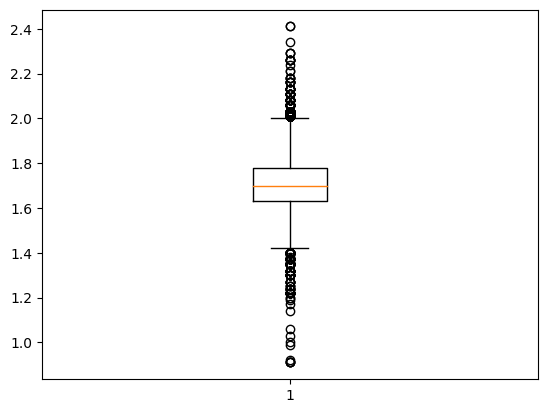

In [23]:
plt.boxplot(df['HeightInMeters'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790cdd84e590>,
 'caps': [<matplotlib.lines.Line2D at 0x790cdd84f7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cdd84f490>],
 'medians': [<matplotlib.lines.Line2D at 0x790cdd84f6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cdd84f790>],
 'means': []}

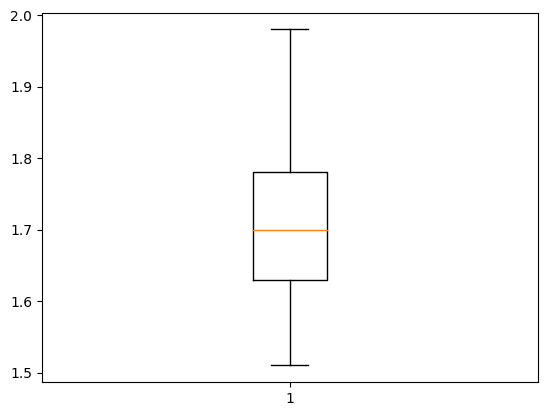

In [24]:
df = df[(df['HeightInMeters'] < 2.0) & (df['HeightInMeters'] > 1.5)]
plt.boxplot(df['HeightInMeters'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790cdd8ef730>,
 'caps': [<matplotlib.lines.Line2D at 0x790cdd8efdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cd63bbfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x790cdd8edf30>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cdd90c820>],
 'means': []}

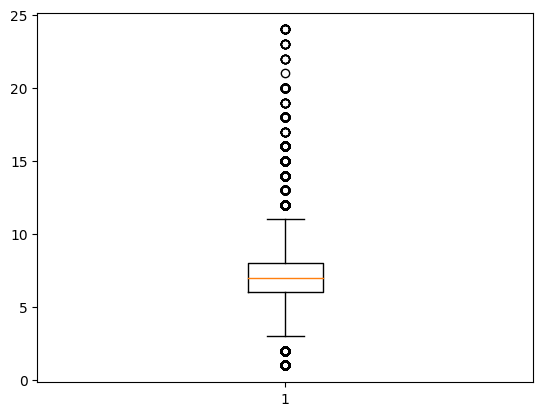

In [25]:
plt.boxplot(df['SleepHours'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790cdd943310>,
 'caps': [<matplotlib.lines.Line2D at 0x790cdd9439a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790cdd943070>],
 'medians': [<matplotlib.lines.Line2D at 0x790cdd984400>],
 'fliers': [<matplotlib.lines.Line2D at 0x790cdd984550>],
 'means': []}

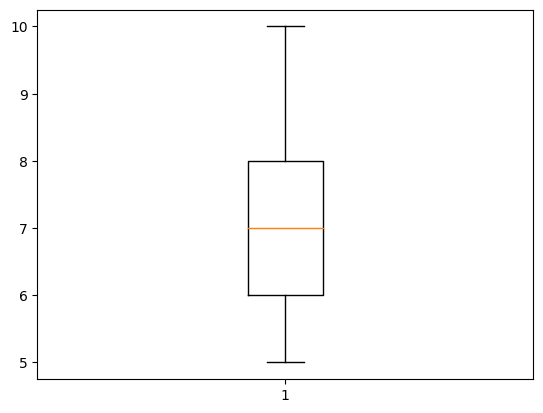

In [26]:
df = df[(df['SleepHours'] < 11.0) & (df['SleepHours'] > 4.0)]
plt.boxplot(df['SleepHours'])

In [27]:
# Now data contains no outlines

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268201 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      268201 non-null  int64  
 1   Sex                        268201 non-null  int64  
 2   GeneralHealth              268201 non-null  int64  
 3   PhysicalHealthDays         268201 non-null  float64
 4   MentalHealthDays           268201 non-null  float64
 5   LastCheckupTime            268201 non-null  int64  
 6   PhysicalActivities         268201 non-null  int64  
 7   SleepHours                 268201 non-null  float64
 8   RemovedTeeth               268201 non-null  int64  
 9   HadHeartAttack             268201 non-null  int64  
 10  HadAngina                  268201 non-null  int64  
 11  HadStroke                  268201 non-null  int64  
 12  HadAsthma                  268201 non-null  int64  
 13  HadSkinCancer              26

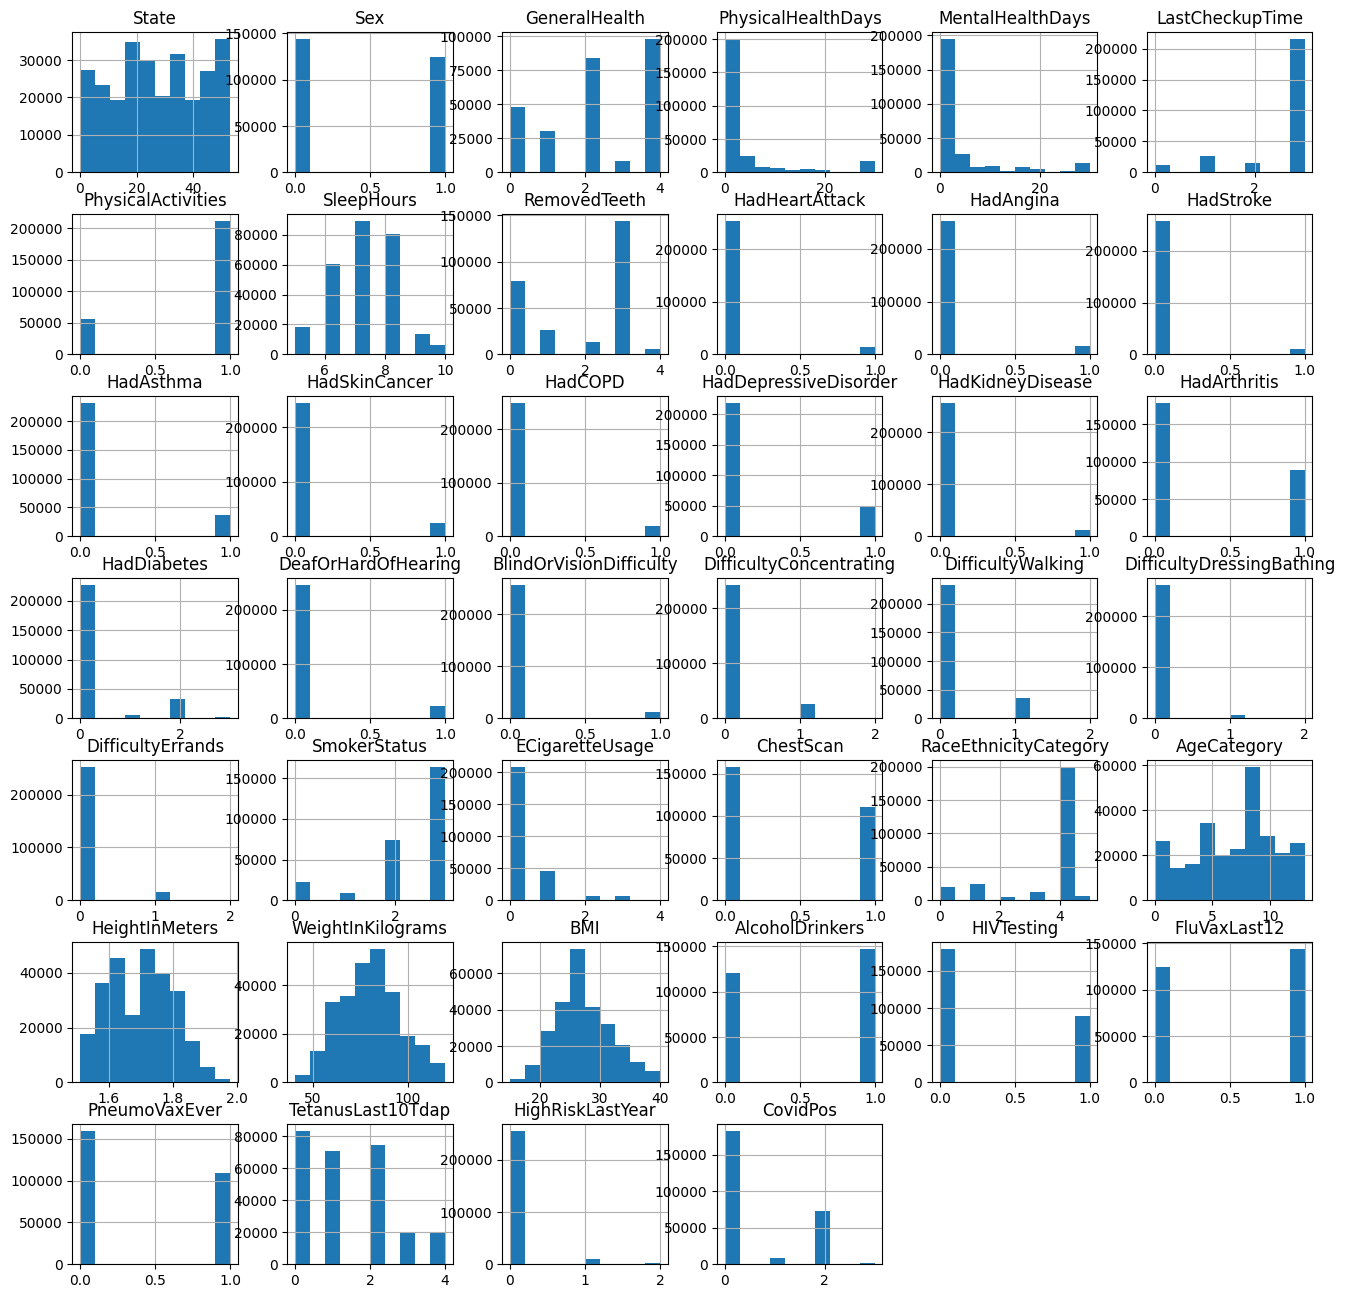

In [28]:
# Show histograms

df.hist(figsize = (16, 16))
plt.show()

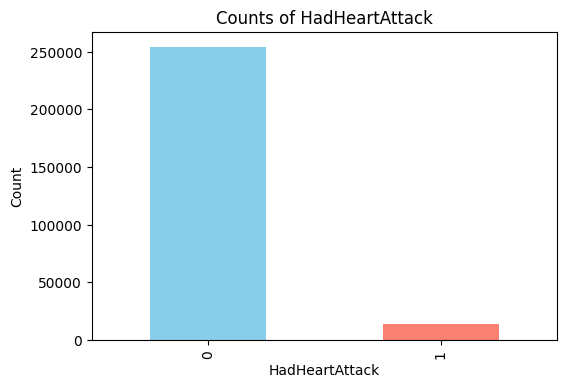

In [29]:
# Show classes count in target value

plt.figure(figsize = (6, 4))
df['HadHeartAttack'].value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Counts of HadHeartAttack')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.show()

In [30]:
df['HadHeartAttack'].value_counts()

0    254472
1     13729
Name: HadHeartAttack, dtype: int64

In [31]:
# Downsemple data frame

df_majority = df[(df['HadHeartAttack'] == 0)]
df_minority = df[(df['HadHeartAttack'] == 1)]

df_majority_downsampled = resample(df_majority, replace = True, n_samples = 13729)

df = pd.concat([df_majority_downsampled, df_minority])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27458 entries, 12515 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      27458 non-null  int64  
 1   Sex                        27458 non-null  int64  
 2   GeneralHealth              27458 non-null  int64  
 3   PhysicalHealthDays         27458 non-null  float64
 4   MentalHealthDays           27458 non-null  float64
 5   LastCheckupTime            27458 non-null  int64  
 6   PhysicalActivities         27458 non-null  int64  
 7   SleepHours                 27458 non-null  float64
 8   RemovedTeeth               27458 non-null  int64  
 9   HadHeartAttack             27458 non-null  int64  
 10  HadAngina                  27458 non-null  int64  
 11  HadStroke                  27458 non-null  int64  
 12  HadAsthma                  27458 non-null  int64  
 13  HadSkinCancer              27458 non-null

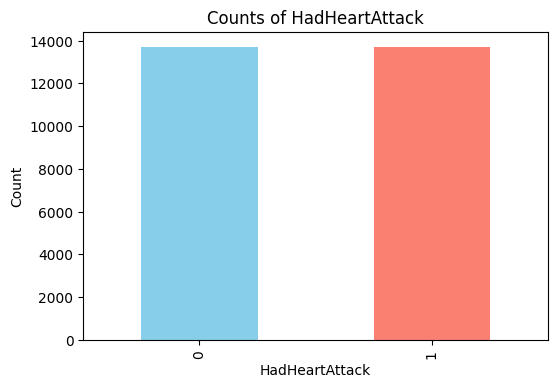

In [32]:
# How we have equel number of persions with heard attacas & not 

plt.figure(figsize = (6, 4))
df['HadHeartAttack'].value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Counts of HadHeartAttack')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.show()

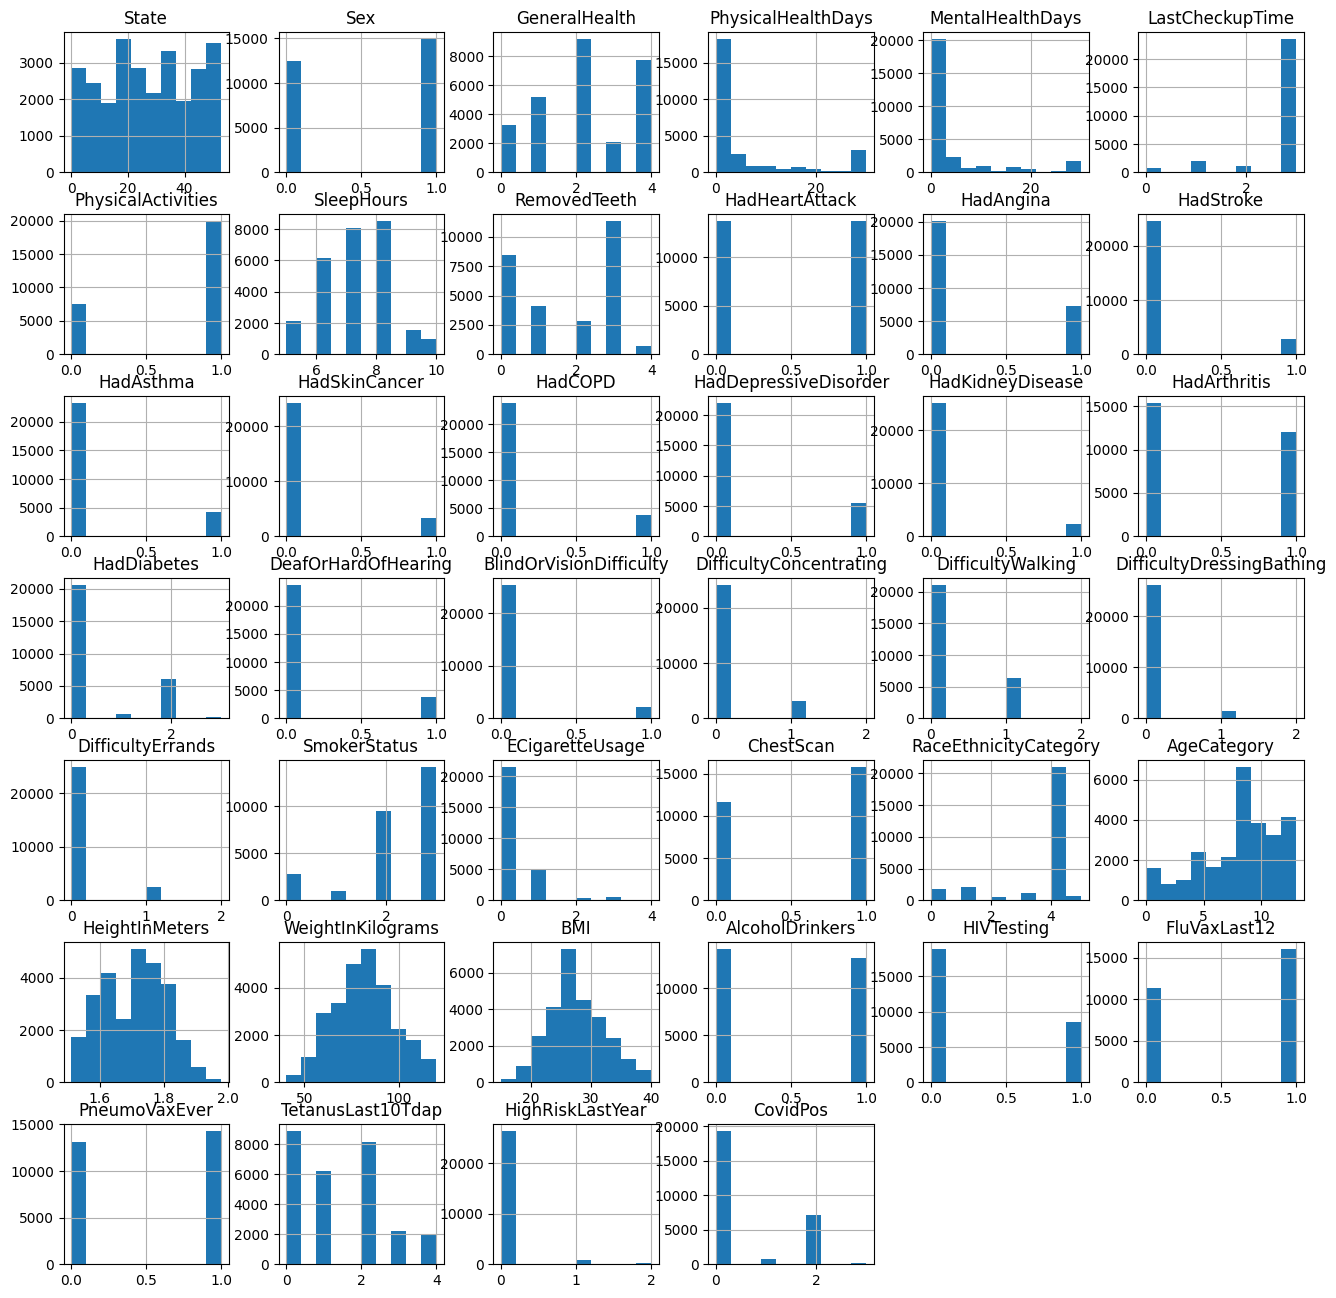

In [33]:
# Show histograms to make sure taht we do not broke whole dataset

df.hist(figsize = (16, 16))
plt.show()

In [34]:
# Grab Pirsion correlations with target value 

cor = df.corr()
cor_target = abs(cor["HadHeartAttack"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("HadHeartAttack" , ascending = False)

,HadHeartAttack
HadHeartAttack,1.000000
HadAngina,0.530964
AgeCategory,0.411660
ChestScan,0.375848
PneumoVaxEver,0.268055
DifficultyWalking,0.265457
HadDiabetes,0.245954
HadArthritis,0.242489
HadStroke,0.241225
PhysicalHealthDays,0.223547


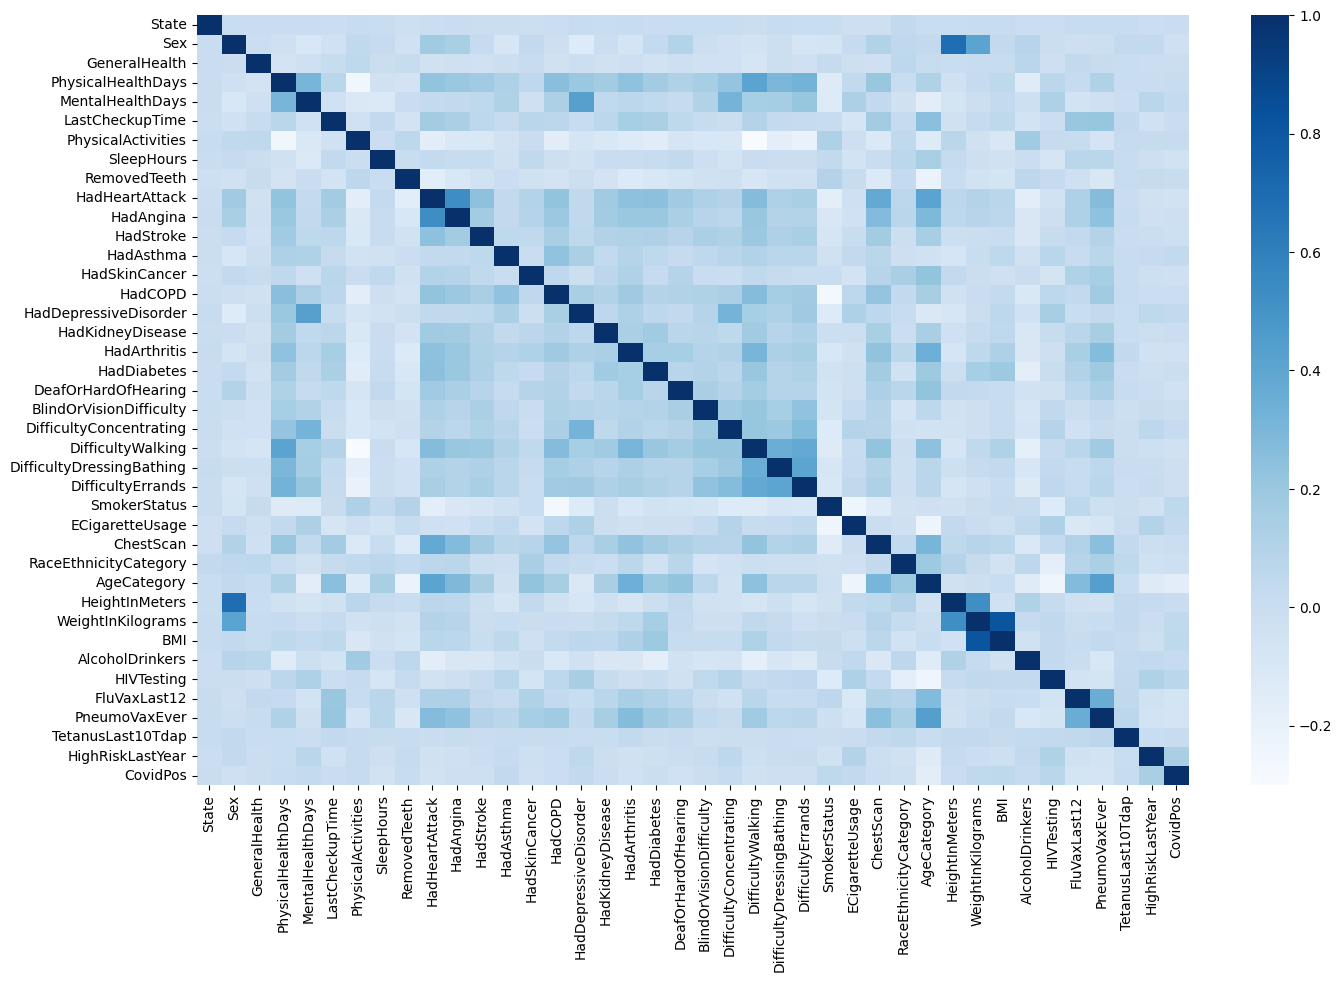

In [35]:
# And plot correlation matrix 

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), cmap = 'Blues')
plt.show()

In [36]:
# Same with Spearman correlation

cor = df.corr(method = 'spearman')
cor_target = abs(cor["HadHeartAttack"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("HadHeartAttack" , ascending = False)

,HadHeartAttack
HadHeartAttack,1.000000
HadAngina,0.530964
AgeCategory,0.394076
ChestScan,0.375848
DifficultyWalking,0.269092
PneumoVaxEver,0.268055
HadDiabetes,0.249772
HadArthritis,0.242489
HadStroke,0.241225
HadCOPD,0.223027


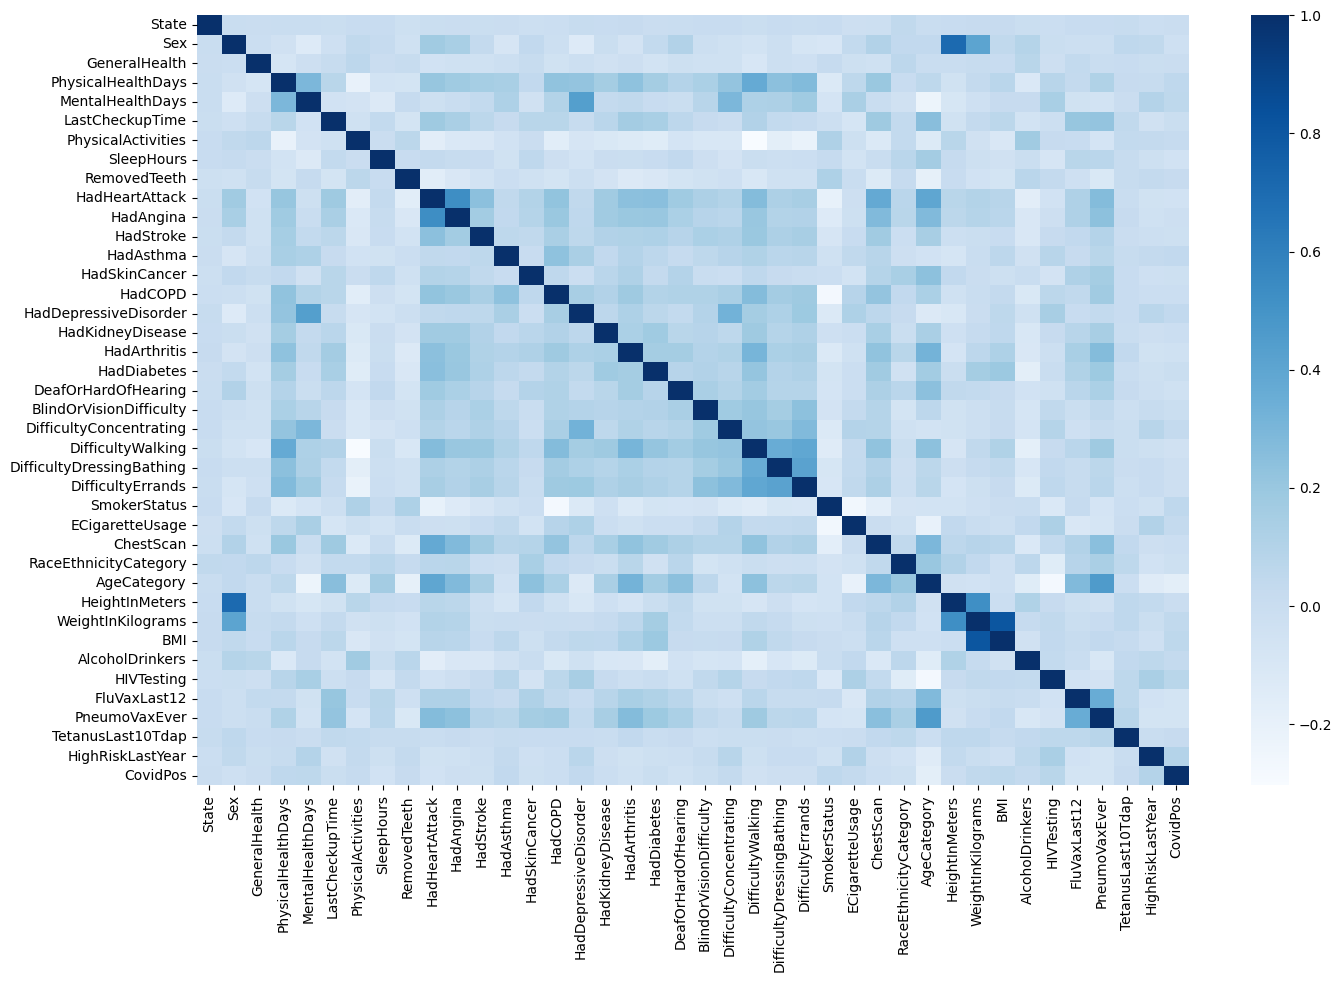

In [37]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(method = 'spearman'), cmap = 'Blues')
plt.show()

In [38]:
# Preprocess data

X = df.drop('HadHeartAttack', axis = 1)
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(max_depth = 3)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
# Shows how model works

pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      2721
           1       0.75      0.81      0.78      2771

    accuracy                           0.77      5492
   macro avg       0.77      0.77      0.77      5492
weighted avg       0.77      0.77      0.77      5492



In [41]:
print(model.feature_importances_)

[0.00000000e+00 5.96338878e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.27472962e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.73457440e-01 0.00000000e+00
 9.74916070e-02 0.00000000e+00 9.81651667e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


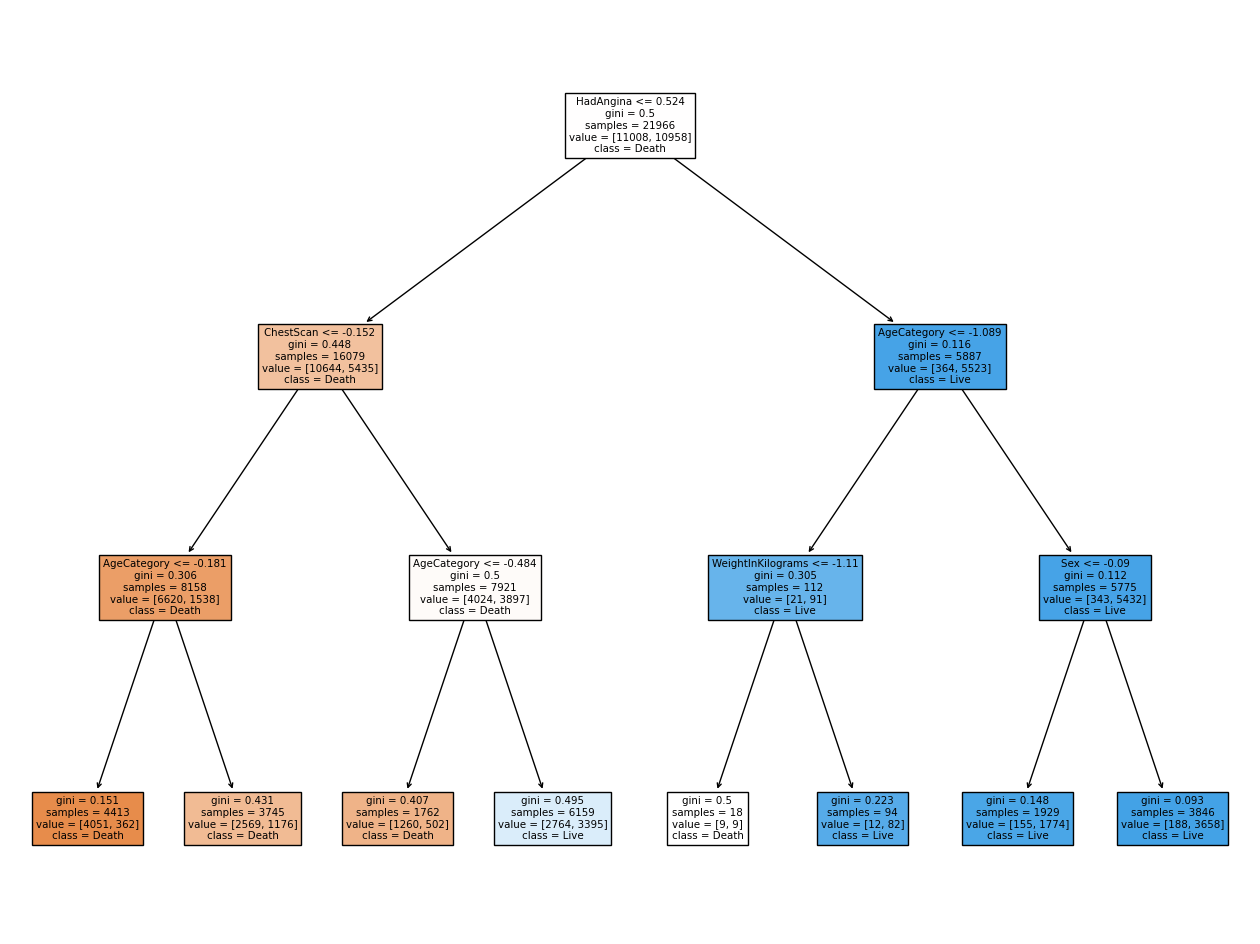

In [42]:
# Bulid plot of decision tree

plt.figure(figsize = (16, 12))
plot_tree(model, feature_names = list(df.drop('HadHeartAttack', axis = 1).columns), filled = True, class_names = ['Death', 'Live'])
plt.show()

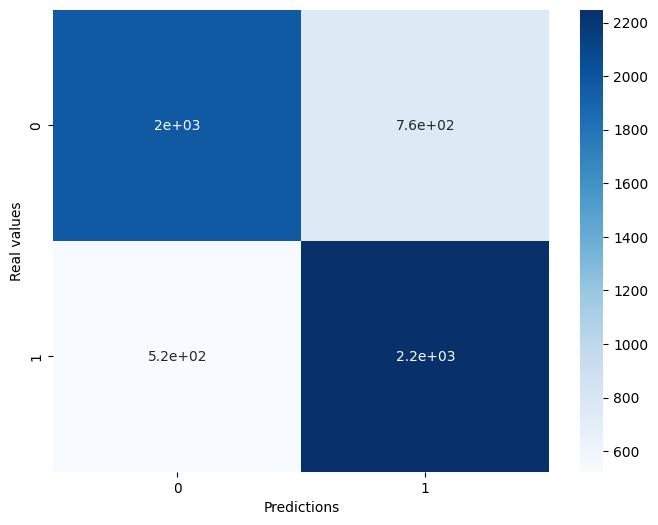

In [43]:
# And confusion matrix 

confusion = confusion_matrix(y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

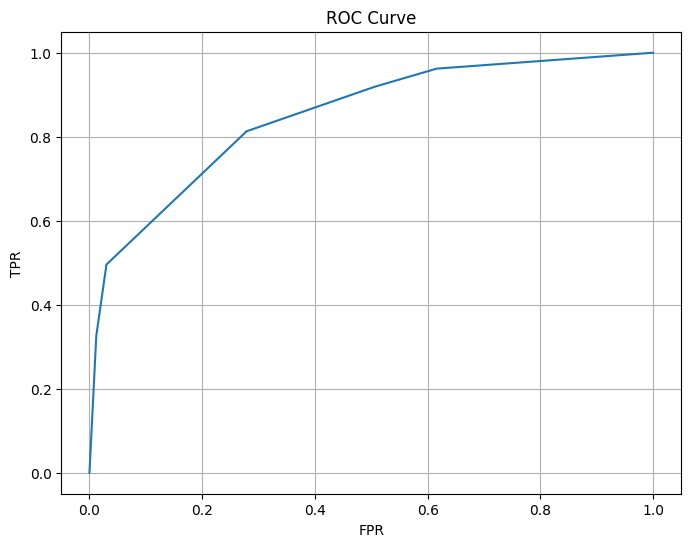

AUC-ROC Score: 0.8490020611703804


In [44]:
# Plot Roc-curve & cout roc-auc

predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)

In [45]:
# Apply PCA, to reduce feature space

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2721
           1       0.71      0.71      0.71      2771

    accuracy                           0.70      5492
   macro avg       0.70      0.70      0.70      5492
weighted avg       0.70      0.70      0.70      5492



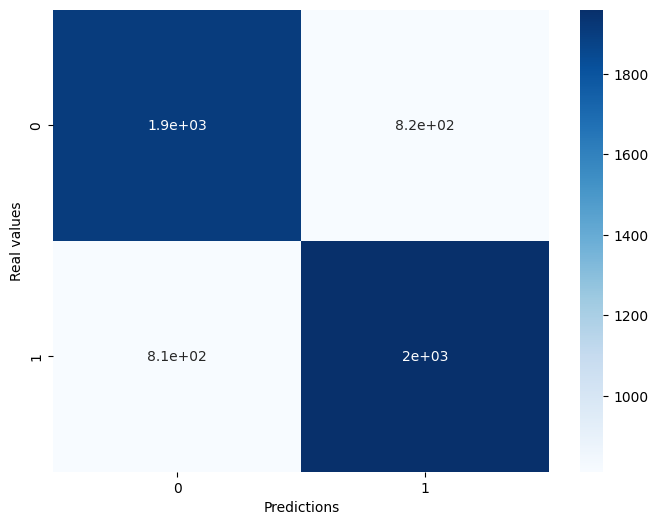

In [46]:
# Do not set max_depth...

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_test, pred))

confusion = confusion_matrix(y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

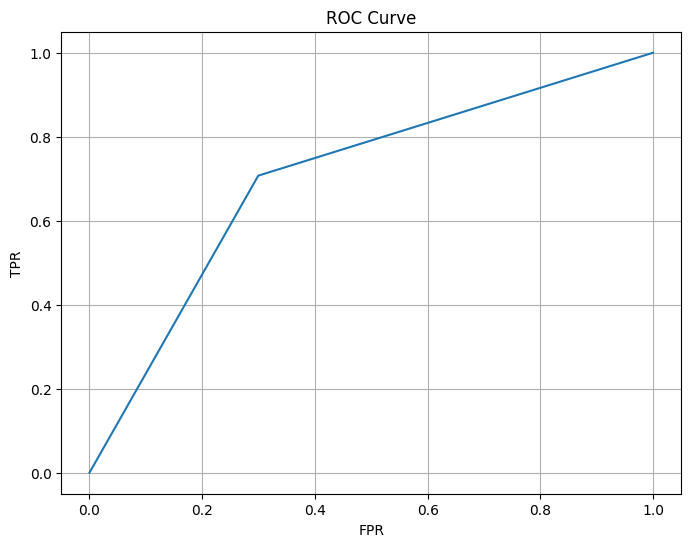

AUC-ROC Score: 0.703901820331355


In [47]:
# Model is overfit

predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)

In [48]:
print(model.feature_importances_)

[0.31544147 0.05161244 0.01922855 0.02302513 0.01464063 0.02685975
 0.01626438 0.01237344 0.0105825  0.0159093  0.01446337 0.01367468
 0.01665685 0.01619879 0.01844356 0.01209391 0.01877323 0.01527826
 0.01386603 0.01773459 0.01327952 0.01538688 0.01304431 0.01337976
 0.01358732 0.02568287 0.0292653  0.04173708 0.02197549 0.02042341
 0.01143353 0.0169088  0.01369097 0.01115725 0.01531343 0.00942262
 0.01956824 0.01631173 0.01531064]


              precision    recall  f1-score   support

           0       0.75      0.87      0.80      2721
           1       0.84      0.71      0.77      2771

    accuracy                           0.79      5492
   macro avg       0.80      0.79      0.79      5492
weighted avg       0.80      0.79      0.79      5492



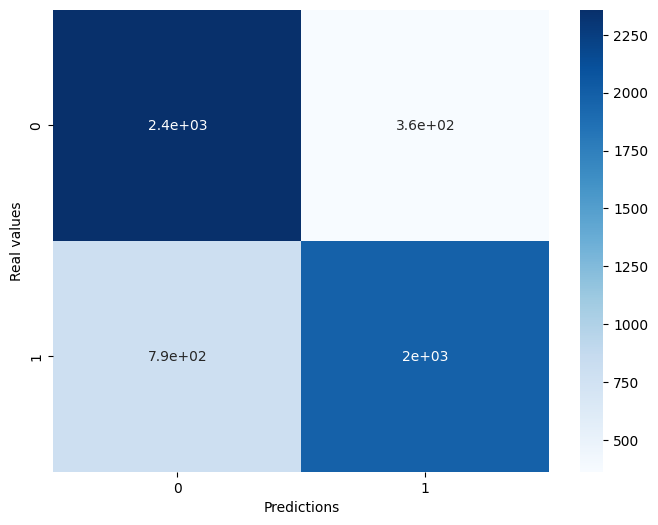

In [49]:
# Try SVM with linear kernel

model = SVC(kernel = 'linear', probability = True)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

confusion = confusion_matrix(y_test, pred)

plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

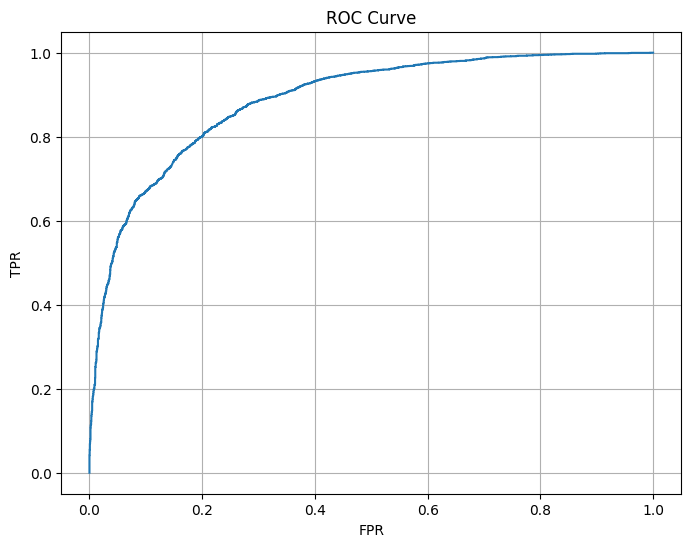

AUC-ROC Score: 0.8868754866615446


In [50]:
predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2721
           1       0.78      0.78      0.78      2771

    accuracy                           0.78      5492
   macro avg       0.78      0.78      0.78      5492
weighted avg       0.78      0.78      0.78      5492



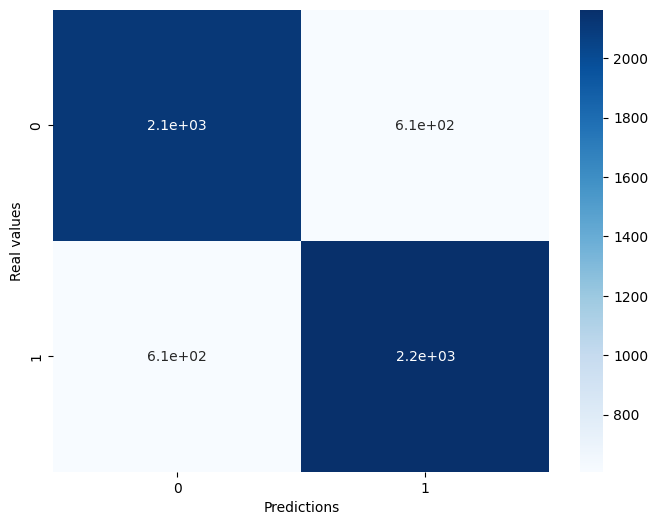

In [51]:
# Try to grap first 10 features that PCA choose as important

X_train = X_train[:, : 10]
X_test = X_test[:, : 10]

model = SVC(kernel = 'linear', probability = True)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

confusion = confusion_matrix(y_test, pred)

plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

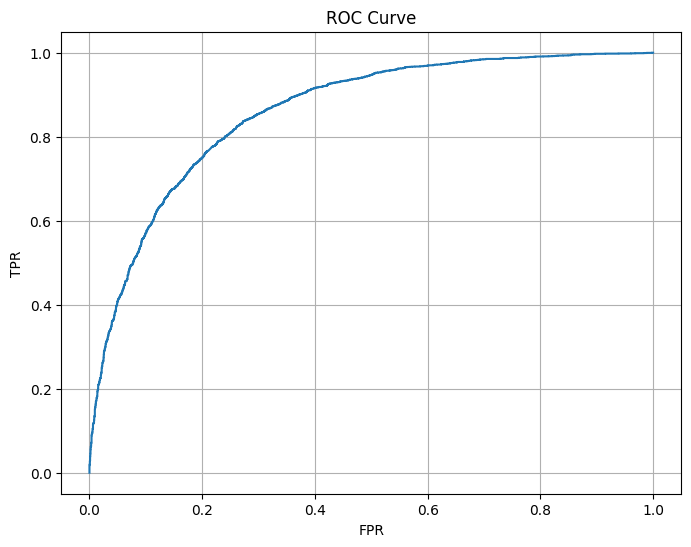

AUC-ROC Score: 0.8588632116830336


In [52]:
# Get worse metrics...

predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)